In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
data = pd.read_csv('diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

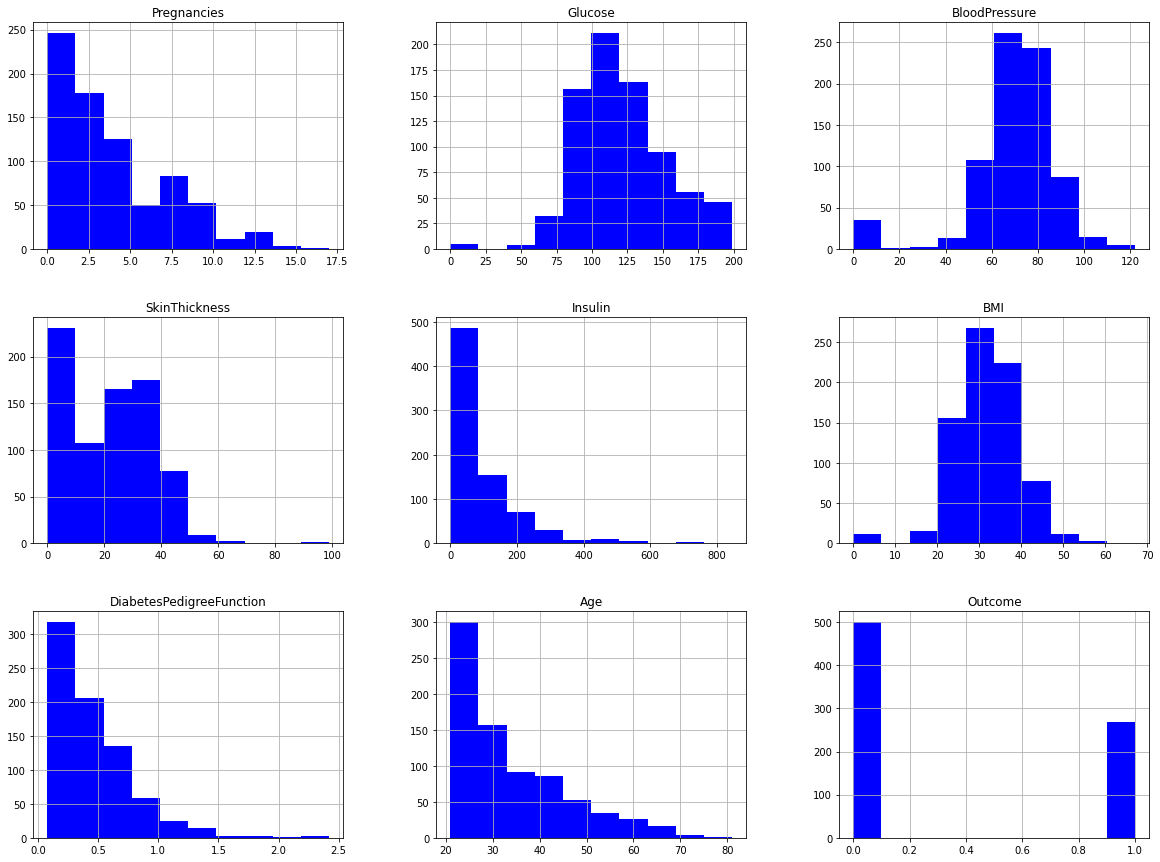

In [ ]:
data.hist(figsize = (20,15),color = 'blue')
plt.show()

### **Splitting into Dependent and Independent Data**

In [ ]:
X=data.drop("Outcome", axis=1) 
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
Y=data['Outcome']
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### **Scaling the data**

In [ ]:
scaler = MinMaxScaler()
X[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = scaler.fit_transform(X)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


### **Train-Test Split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 32)
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
196,0.058824,0.527638,0.475410,0.000000,0.000000,0.362146,0.046541,0.000000
22,0.411765,0.984925,0.737705,0.000000,0.000000,0.593145,0.159266,0.333333
137,0.000000,0.467337,0.491803,0.252525,0.108747,0.427720,0.193851,0.016667
469,0.352941,0.773869,0.639344,0.414141,0.165485,0.687034,0.210504,0.100000
627,0.000000,0.663317,0.639344,0.000000,0.000000,0.482861,0.134500,0.000000


In [ ]:
x_train.shape

(691, 8)

In [ ]:
x_test.shape

(154, 8)

In [ ]:
y_train.shape

(614,)

In [ ]:
y_test.shape

(154,)

## **Training the Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
model2 = SVC()
model2.fit(x_train,y_train)

SVC()

In [ ]:
model3 = DecisionTreeClassifier()
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
model4 = RandomForestClassifier()
model4.fit(x_train,y_train)

RandomForestClassifier()

### **Prediction and Evaluation**

In [ ]:
prediction = model.predict(x_test)
accuracy_score(y_test, prediction)

0.7857142857142857

In [ ]:
prediction2 = model2.predict(x_test)
accuracy_score(y_test, prediction2)

0.7857142857142857

In [ ]:
prediction3 = model3.predict(x_test)
accuracy_score(y_test, prediction3)

0.7402597402597403

In [ ]:
prediction4 = model4.predict(x_test)
accuracy_score(y_test, prediction4)

0.8051948051948052

Since the accuracy score is best in case of Random Forest Classifier, we are going to use the model fitted using Random Forest.